# Notebook Dedicated to Build the real data distribution vs the MC model of B8 Solar Nue + Tl208

In [32]:
import numpy as np
import pandas as pd
import random 

import glob
import re
import os

import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
from matplotlib import cm

from scipy.interpolate import interp1d

In [3]:
7631.86 - 4484.28

3147.58

# Load the Data

In [33]:
# ------- Observable list -------

#Define the name of the observables to be loaded. It will be applied to MC and Data, correspondingly
obs_list_mc = ['energy', 'posr_av', 'posx', 'posy', 'posz_av', 'n_init_evs']
obs_list_data = ['energy', 'posr_av', 'posx', 'posy', 'posz_av']

## MC Data

### B8 Nue (Unoscillated)

In [55]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Nue/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Nue/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Nue_mc = {obs: np.array([]) for obs in obs_list_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Nue_mc[obs] = np.append(obs_dict_b8_Nue_mc[obs], obs_i)

energy_b8_Nue_mc = obs_dict_b8_Nue_mc['energy']
n_init_evs_b8_Nue_mc = obs_dict_b8_Nue_mc['n_init_evs']

### B8 Numu

In [35]:
#main_dir = 'E:/Data/solars/mc/bisMSB/b8Numu/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/b8Numu/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_b8_Numu_mc = {obs: np.array([]) for obs in obs_list_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_b8_Numu_mc[obs] = np.append(obs_dict_b8_Numu_mc[obs], obs_i)

energy_b8_Numu_mc = obs_dict_b8_Numu_mc['energy']
n_init_evs_b8_Numu_mc = obs_dict_b8_Numu_mc['n_init_evs']

### Tl208

In [36]:
#main_dir = 'E:/Data/solars/mc/bisMSB/tl208/np_array_resume/'
main_dir = '/home/joankl/data/solars/mc/bisMSB/tl208/np_array_resume/'

# ------- Observable Dictionary -------
obs_dict_tl208_mc = {obs:  np.array([]) for obs in obs_list_mc}

# ------- Load and save observables in dictionary -------
for obs in obs_list_mc:
    obs_i = np.load(main_dir + obs + '.npy')
    obs_dict_tl208_mc[obs] = np.append(obs_dict_tl208_mc[obs], obs_i)

energy_tl208_mc = obs_dict_tl208_mc['energy']
n_init_evs_tl208_mc = obs_dict_tl208_mc['n_init_evs']

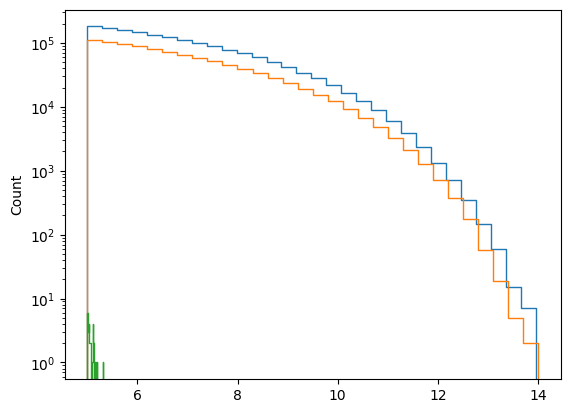

In [6]:
sn.histplot(energy_8b_Nue_mc, bins = 30, element = 'step', alpha = 0)
sn.histplot(energy_8b_Numu_mc, bins = 30, element = 'step', alpha = 0)
sn.histplot(energy_tl208_mc, bins = 30, element = 'step', alpha = 0)
plt.yscale('log')
plt.show()

# PSelmaa Data for 8B Nue Osc. and GS98 Solar Model

In [37]:
Pee_dir = '/home/joankl/data/solars/mc/PSelmaa/'
fname = 'pselmaa_test_sun_pee_B16_GS98_b8.txt'

PSelmaa_data = np.loadtxt(Pee_dir + fname, skiprows=1)
Pee = PSelmaa_data[:,1]
Pee_energy = PSelmaa_data[:,0]

## Real Data

In [38]:
# ------- Directory of data -------
#data_type = ['analysis15', 'analysis15_bMR', 'analysis20_bMR']
#main_dir = 'E:/Data/solars/solarnu_Realdata/bisMSB/first_candidates/analysis*/resume_files/'
#main_dir = '/content/drive/MyDrive/SNO+ Analysis/data/solar_data/real_data/bis_MSB/Analysis*/resume_files/'
main_dir = '/home/joankl/data/solars/real_data/bisMSB/first_candidates/analysis*/resume_files/'

# ------- Observable Dictionary -------
obs_dict_data = {obs: np.array([]) for obs in obs_list_data}

# Loop over the observable list to load the data in obs_dict

for obs in obs_list_data:
    obs_dir_list = glob.glob(main_dir + obs + '.npy') # List of directories where the obs is

    # Now loop over the list of directories
    for fdir in obs_dir_list:
        obs_i = np.load(fdir)

        #Save the loaded numpy array in the corresponding key observable in the observable dictioary
        obs_dict_data[obs] = np.append(obs_dict_data[obs], obs_i)

energy_data = obs_dict_data['energy']
#posr_av = obs_dict['posr_av']
#posx = obs_dict['posx']
#posy = obs_dict['posy']
#posz = obs_dict['posz_av']

# MC Data Scaling Factors

In [39]:
# ======= Definition of Important Quantities =======

# ------ Dataset Lifetime ------
dataset_lf_time = 339.25  # days

# ------ Expected event rate per day ------
N_b8_Nue_per_day = 862.65/365
N_b8_Numu_per_day = (1151.75 - 862.65)/365  #(rate_{nue} - rate_{nue + numu + nutau})
N_tl208_per_day = 2.576448     

# ------ MC selection efficiency ------
# 8B Nue
n_init_evs_b8_Nue = np.sum(n_init_evs_b8_Nue_mc)
n_final_evs_b8_Nue = len(energy_b8_Nue_mc)
eff_mc_b8_Nue = n_final_evs_b8_Nue / n_init_evs_b8_Nue

# 8B Numu
n_init_evs_b8_Numu = np.sum(n_init_evs_b8_Numu_mc)
n_final_evs_b8_Numu = len(energy_b8_Numu_mc)
eff_mc_b8_Numu = n_final_evs_b8_Numu / n_init_evs_b8_Numu

# Tl208
n_init_evs_tl208 = np.sum(n_init_evs_tl208_mc)
n_final_evs_tl208 = len(energy_tl208_mc)
eff_mc_tl208 = n_final_evs_tl208 / n_init_evs_tl208

# ------ Nº of expected events within Lifetime and cuts ------
N_scaled_mc_b8_Nue = dataset_lf_time * N_b8_Nue_per_day * eff_mc_b8_Nue
N_scaled_mc_b8_Numu = dataset_lf_time * N_b8_Numu_per_day * eff_mc_b8_Numu
N_scaled_mc_tl208 = dataset_lf_time * N_tl208_per_day * eff_mc_tl208

# ------ Scaling factors: weight to mc histograms ------
scaling_mc_b8_Nue = N_scaled_mc_b8_Nue/n_final_evs_b8_Nue
scaling_mc_b8_Numu = N_scaled_mc_b8_Numu/n_final_evs_b8_Numu
scaling_mc_tl208 = N_scaled_mc_tl208/n_final_evs_tl208

# ========= See Quantites =========
print(F'====== For a Dataset Lifetime = {dataset_lf_time:.2f} days ======')
print(f'The expected B8 Nue events are {N_scaled_mc_b8_Nue:.3f} with selection efficiency = {eff_mc_b8_Nue}')
print(f'The expected B8 Numu events are {N_scaled_mc_b8_Numu:.3f} with selection efficiency = {eff_mc_b8_Numu}')
print(f'The expected Tl208 events are {N_scaled_mc_tl208} with selection efficiency = {eff_mc_tl208}')

====== For a Dataset Lifetime = 339.25 days ======
The expected B8 Nue events are 162.812 with selection efficiency = 0.2030605751190879
The expected B8 Numu events are 47.667 with selection efficiency = 0.17739561040050433
The expected Tl208 events are 0.01759969451210679 with selection efficiency = 2.0135568306839213e-05


# Plots

### - Plot Settings and Styles

In [40]:
font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':11}

font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=9)

### - Tick marker function

Function to plot tick markers on the axis of a plot. Initially, it will be used for the spectral plots

In [41]:
def set_ticks(ax):
    # ---- X axis ----
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.xaxis.set_major_formatter(ScalarFormatter(1))

    # ---- Y axis ----
    #ax.yaxis.set_minor_locator(MultipleLocator(5))
    #ax.yaxis.set_major_formatter(ScalarFormatter())

    # ---- Show ticks on all sides ----
    ax.tick_params(which='minor', top=True, bottom=True, left=True, right=True)
    ax.tick_params(which='major', top=True, bottom=True, left=True, right=True)

## Energy

In [51]:
binwidth = 0.4

energy_bins = list(np.arange(min(energy_data),
                             max(energy_data) + binwidth,
                             binwidth))  #These are the energy bin edges

np.array(energy_bins)

array([ 5.00371605,  5.40371605,  5.80371605,  6.20371605,  6.60371605,
        7.00371605,  7.40371605,  7.80371605,  8.20371605,  8.60371605,
        9.00371605,  9.40371605,  9.80371605, 10.20371605, 10.60371605,
       11.00371605, 11.40371605, 11.80371605, 12.20371605])

/tmp/ipykernel_18832/2262942044.py:83: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax_bot.set_ylim(0, 2e-2)


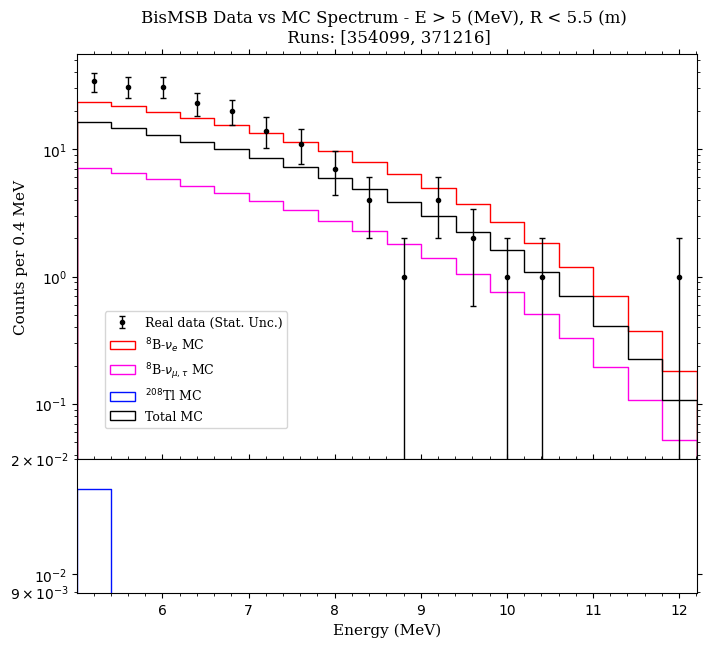

In [60]:
# ----------------------------
# Bins Definition
# ----------------------------
binwidth = 0.4

energy_bins = list(np.arange(min(energy_data),
                             max(energy_data) + binwidth,
                             binwidth))  #These are the energy bin edges

bins_center_energy = (np.array(energy_bins)[:-1] + np.array(energy_bins)[1:])/2


# ===============  MC Distribution and Osc. Nue ===============

counts_B8_Nue_mc, _ = np.histogram(energy_b8_Nue_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Nue_mc)) * scaling_mc_b8_Nue)
counts_B8_Numu_mc, _ = np.histogram(energy_b8_Numu_mc, bins = energy_bins, weights = np.ones(len(energy_b8_Numu_mc)) * scaling_mc_b8_Numu)
counts_tl208_mc, _ = np.histogram(energy_tl208_mc, bins = energy_bins, weights = np.ones(len(energy_tl208_mc)) * scaling_mc_tl208)

# ----------- Oscilated Nue -----------
Pee_f = interp1d(Pee_energy, Pee, kind='linear', bounds_error=False, fill_value=0)  # function that describes the interpolation
Pee_int = Pee_f(bins_center_energy)                                                 # Interpolation Values

counts_B8_Nue_mc_osc = counts_B8_Nue_mc * Pee_int

# ----------- Total MC -----------
total_mc_counts_osc = counts_B8_Nue_mc_osc + counts_B8_Numu_mc + counts_tl208_mc
total_mc_counts = counts_B8_Nue_mc + counts_B8_Numu_mc + counts_tl208_mc

# =============== Real Data Distribution Points ===============

energy_counts, edges = np.histogram(energy_data, bins = energy_bins)
bins_center_energy = (edges[:-1] + edges[1:])/2
error_bars = np.sqrt(energy_counts)

# Remove zero count points in real data
bins_center_energy_real_data  = bins_center_energy[energy_counts>0]
error_bars = error_bars[energy_counts>0]
energy_counts = energy_counts[energy_counts>0]

# =============== Plots Building ===============

# Define axes: Construct subplots to conveniently represent the low contribution of the 208Tl spectrum
fig, (ax_top, ax_bot) = plt.subplots(2, 1, sharex=True,figsize=(8,7),
                                     gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.0})


# --------- Plot functions ---------
# Real data
ax_top.errorbar(bins_center_energy_real_data, energy_counts,
            yerr=error_bars, fmt='.',
            color='black', label='Real data (Stat. Unc.)',
            elinewidth=1, capsize=2)

# MC components
sn.histplot(x=energy_b8_Nue_mc, bins=energy_bins, weights=np.ones(len(energy_b8_Nue_mc))*scaling_mc_b8_Nue,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_e$ MC', color = '#ff0000')

sn.histplot(x=energy_b8_Numu_mc, bins=energy_bins, weights=np.ones(len(energy_b8_Numu_mc))*scaling_mc_b8_Numu,
            element='step', alpha=0, ax=ax_top, label=r'$^8$B-$\nu_{\mu,\tau}$ MC', color = '#ff00e6')


sn.histplot(x=energy_tl208_mc, bins=energy_bins, weights=np.ones(len(energy_tl208_mc))*scaling_mc_tl208,
            element='step', alpha=0, ax=ax_bot, label=r'$^{208}$Tl MC', color = '#0011ff')

#ax_top.hist(bins_center_energy, bins=energy_bins, weights = counts_B8_Nue_mc,
#            histtype='step', linewidth=1.0, label=r'Osc. $^8$B-$\nu_e$ MC', color = '#16fc05')

ax_top.hist(bins_center_energy, bins = energy_bins, weights = total_mc_counts_osc, histtype='step', 
            color='black', linewidth=1.0, label='Total MC')

# --------- Axes Settings ---------

#Scale
ax_top.set_yscale('log')
ax_bot.set_yscale('log')

#Ticks
set_ticks(ax_top)
set_ticks(ax_bot)

#axis limits
ax_top.set_xlim(edges[0], edges[-1])
ax_bot.set_ylim(0, 2e-2)

# --------- Titles ---------

ax_bot.set_xlabel('Energy (MeV)', fontdict = font_style_axis)
ax_top.set_ylabel(f'Counts per {binwidth} MeV', fontdict = font_style_axis)
ax_bot.set_ylabel('')

# ---- Build a single legend combining both axes ----
#Order to appear the Legends
order = ['Real data (Stat. Unc.)',
         r'$^8$B-$\nu_e$ MC',
         r'$^8$B-$\nu_{\mu,\tau}$ MC',
         r'$^{208}$Tl MC',
         'Total MC'
         ]

handles_top, labels_top = ax_top.get_legend_handles_labels()
handles_bot, labels_bot = ax_bot.get_legend_handles_labels()

handles = handles_top + handles_bot
labels  = labels_top  + labels_bot

label_to_handle = dict(zip(labels, handles))
ordered_handles = [label_to_handle[l] for l in order]

ax_top.legend(ordered_handles, order, bbox_to_anchor=(0.35, 0.38), prop = font_prop)
# ------------------ end of common legends-------------------

ax_top.set_title('BisMSB Data vs MC Spectrum - E > 5 (MeV), R < 5.5 (m) \n Runs: [354099, 371216]', fontdict = font_style_title, y = 1.01)

plt.show()

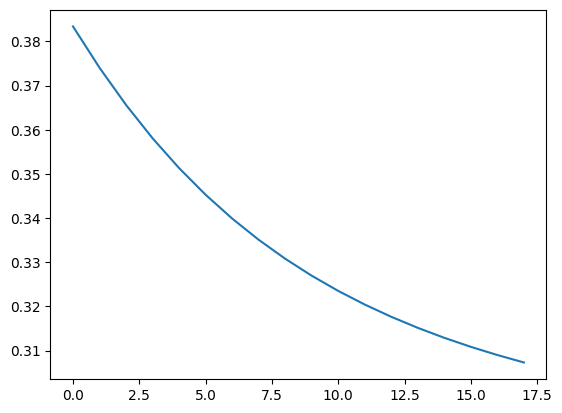

In [57]:
plt.plot(Pee_int)